In [228]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [19]:
#cast.title.value_counts()[0:10]
df = cast[['year', 'title']].drop_duplicates()
df.title.value_counts()

Hamlet                  17
Macbeth                 15
Carmen                  12
The Outsider            11
Maya                    11
Anna Karenina           10
Temptation              10
Othello                 10
She                     10
Paradise                 9
The Three Musketeers     9
Rage                     9
Underground              9
Vengeance                9
Blood Money              9
...
Roman Buildings                                     1
Zerkalo dlya geroya                                 1
Man-Eater                                           1
The Hunger Games: Mockingjay - Part 2               1
WinneToons - Die Legende vom Schatz im Silbersee    1
Chepachet                                           1
No More Monkeys Jumpin' on the Bed                  1
Good Night, Vienna                                  1
Foxy Lady                                           1
Uyirvarai Iniththaai                                1
Galegale Nigahle                                   

### Which three years of the 1930s saw the most films released?

In [303]:
df = cast.copy()
df = df.drop_duplicates(['year', 'title'])
df['decade'] = df.year // 10
df[df.decade == 193].year.value_counts()

1937    1046
1936    1035
1938     964
1935     962
1934     898
1932     878
1939     865
1933     841
1931     822
1930     749
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

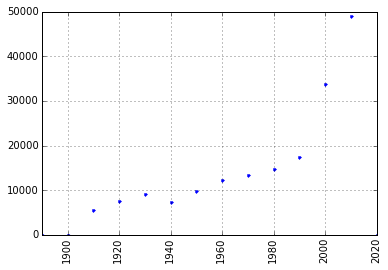

In [172]:
df = cast.copy()
df['decade'] = (cast.year // 10)*10
df = df.drop_duplicates(subset=['year', 'title'])
counts = df.decade.value_counts()
counts.sort_index().plot(style='.', rot=90)

### Plot the number of "Hamlet" films made each decade.

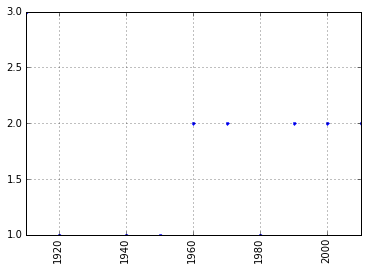

In [173]:
counts = df[df.title == 'Hamlet']
counts.decade.value_counts().sort_index().plot(
    rot=90, style='.')

Relative movie contribution by Hamlet over decades

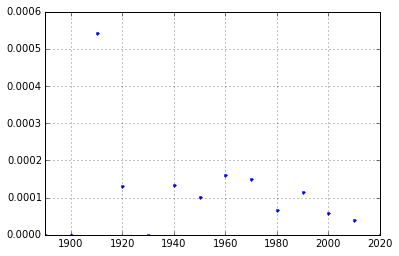

In [174]:
df_sub = df[df.title == 'Hamlet']
hamlet_counts = df_sub.decade.value_counts().sort_index()
counts = df.decade.value_counts().sort_index()

hamlet_counts.div(counts, fill_value=0).plot(style='.')

### Plot the number of "Rustler" characters in each decade of the history of film.

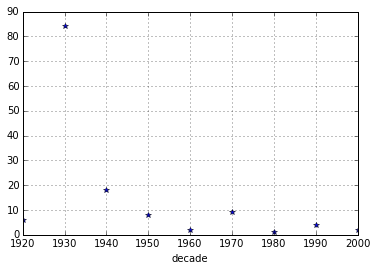

In [307]:
df = cast.copy()
df['decade'] = (cast.year // 10)*10
groups = df[df.character == 'Rustler'].groupby('decade')
groups.size().sort_index().plot(style='*')

### Plot the number of "Hamlet" characters each decade.

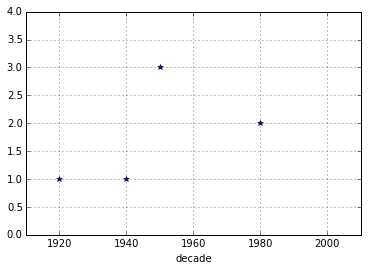

In [308]:
groups = df[df.character == 'Hamlet'].\
    groupby('decade').size().plot(style='*',
                                 xlim=1910,
                                 ylim=[0,4])

### What are the 11 most common character names in movie history?

In [309]:
groups = df.groupby('character')
groups.size().order(ascending=False)[:11]

character
Himself        18980
Dancer         11557
Extra           9897
Reporter        7857
Doctor          7147
Student         6691
Policeman       6672
Party Guest     6430
Nurse           6368
Bartender       6342
Minor Role      6108
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [310]:
groups = df.groupby('character')
groups.get_group('Herself').groupby('name').size().order(ascending=False)[:10]

name
Joyce Brothers        14
Queen Elizabeth II    11
Lili?n Garc?a          8
Mary Jo Pehl           7
Margaret Thatcher      7
Joan Rivers            6
Marilyn Monroe         5
Rekha                  5
Bunny Yeager           5
Kareena Kapoor         5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [311]:
groups = df.groupby('character')
groups.get_group('Himself').groupby('name').size().order(ascending=False)[:10]

name
Adolf Hitler             96
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           21
Benito Mussolini         20
Franklin D. Roosevelt    20
Winston Churchill        20
Bill Clinton             20
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [312]:
df[df.year == 1945].groupby('name').size().\
    order(ascending=False)[:12]

name
Emmett Vogan        39
Sam (II) Harris     30
Harold Miller       29
Bess Flowers        28
Nolan Leary         27
Frank O'Connor      26
Franklyn Farnum     25
Larry Steers        25
Pierre Watkin       24
Charles Sullivan    24
Herman Hack         24
Edmund Cobb         24
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [313]:
counts = df[df.year == 1985].groupby('type')
c1 = counts.get_group('actor').groupby('name').size().\
    order(ascending=False)[:15]
    
c2 = counts.get_group('actress').groupby('name').size().\
    order(ascending=False)[:15]

print(c1.head())
print(c2.head())

name
Mammootty        21
Shakti Kapoor    19
Mohanlal         15
Lou Scheimer     15
Raj Babbar       14
dtype: int64
name
Sukumari          19
Aruna Irani       14
Rati Agnihotri    10
Shobana           10
Smita Patil        9
dtype: int64


decade  type   
1890    actor          2
        actress        1
1900    actor         54
        actress       16
1910    actor      26843
dtype: int64
type     actor  actress
decade                 
1890         2        1
1900        54       16
1910     26843    15385
1920     47146    23256
1930    148817    48687


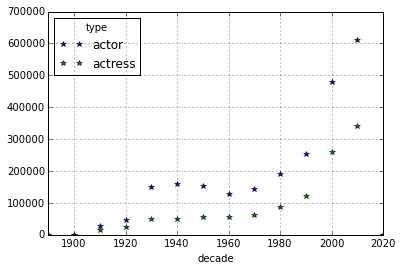

In [314]:
c = df
g = c.groupby([c.decade, 'type']).size()
print(g.head())
print(g.unstack('type').fillna(0).head())
g.unstack('type').fillna(0).plot(style='*');

In [319]:
c = df[(df.character == 'Kermit the Frog')
      | (df.character == 'Oscar the Grouch')]

g = c.groupby(['decade', 'character']).size()
g

decade  character       
1970    Kermit the Frog     1
1980    Kermit the Frog     4
        Oscar the Grouch    1
1990    Kermit the Frog     2
        Oscar the Grouch    1
2000    Kermit the Frog     1
        Oscar the Grouch    1
2010    Kermit the Frog     1
dtype: int64

In [328]:
u = g.unstack('character').fillna(0)
u

character,Kermit the Frog,Oscar the Grouch
decade,,
1970,1,0
1980,4,1
1990,2,1
2000,1,1
2010,1,0


In [340]:
# add more to index
u = g.unstack('character').fillna(0)
u['extra'] = 1
u = u.set_index('extra', append=True)
u.unstack('decade')

character Kermit the Frog                     Oscar the Grouch                 \
decade               1970 1980 1990 2000 2010             1970 1980 1990 2000   
extra                                                                           
1                       1    4    2    1    1                0    1    1    1   

character       
decade    2010  
extra           
1            0

### Plot how many roles Mammootty has played in each year of his career.

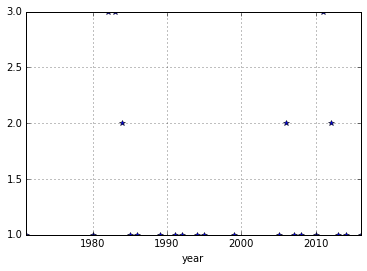

In [276]:
df[df.name == 'Mammootty'].groupby('year').size().\
    plot(style='*')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [169]:
df[df.character.str.startswith('Patron in')].groupby('name').head()

,title,year,name,type,character,n,decade
19529,Let It Ride,1989,Ralph Ahn,actor,Patron in Chinese Restaurant,43,1980
23901,Missing Pieces,2012,Rico Alago,actor,Patron in Restaurant,NaN,2010
46065,The Mothman Prophecies,2002,Tony Amen,actor,Patron in Coffee Shop,NaN,2000
90020,Crashing,2007,Robyn August,actor,Patron in the Coffee House,50,2000


### What are the 10 most frequent roles that start with the word "Science"?

In [171]:
df[df.character.str.startswith('Science')].groupby('name').head(100)

,title,year,name,type,character,n,decade
11134,Teen Wolf Too,1987,Matthew T. Adams,actor,Science Student,NaN,1980
30551,Three O'Clock High,1987,Michael Alex,actor,Science Kid,25,1980
128253,The Giggles,2013,Kevin Barnstein,actor,Science Performer 3,19,2010
233909,Homecoming,2011,Ryan Boyle,actor,Science Student,NaN,2010
329665,"A Wreck, a Tangle",2000,Peter Carroll,actor,Science Voice Over,6,2000


Most problems below are quite similar

### Plot the n-values of the roles that Judi Dench has played over her career.

### Plot the n-values of Cary Grant's roles through his career.

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?